In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import neurd

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


/usr/local/lib/python3.8/dist-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.8/dist-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.8/dist-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument 

In [3]:
from mesh_tools import trimesh_utils as tu
from python_tools import ipyvolume_utils as ipvu
from neurd import neuron_visualizations as nviz

In [4]:
neurd.set_volume_params(
    volume = "microns"
)

# Data Prep: Loading mesh

In [5]:
from mesh_tools import trimesh_utils as tu

In [8]:
segment_id = 864691135013273494

In [9]:
mesh_filepath = f"./{segment_id}.off"
mesh = tu.load_mesh_no_processing(mesh_filepath)
mesh

<trimesh.Trimesh(vertices.shape=(68149, 3), faces.shape=(152455, 3))>

In [15]:
ipvu.plot_objects(mesh)

/usr/local/lib/python3.8/dist-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  warnings.warn(


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Step 1: Decimation

In [10]:
#/mnt/lab/users/celiib/neurd_packages/neuron_mesh_tools/Auto_Proofreading/Minnie65_Pipeline/Morphology/m65_morphology_2_Decimation_v1.ipynb

In [16]:
decimation_kwargs = dict(
    decimation_ratio =0.25,
)

In [17]:
mesh_dec = tu.decimate(
    mesh,
    **decimation_kwargs
)

xvfb-run -n 4231 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_33876.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_33876_decimated.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/decimation_meshlab_25322712.mls


In [18]:
print(f"mesh = {mesh}")
print(f"mesh_dec = {mesh_dec}")

mesh = <trimesh.Trimesh(vertices.shape=(68149, 3), faces.shape=(152455, 3))>
mesh_dec = <trimesh.Trimesh(vertices.shape=(14431, 3), faces.shape=(44005, 3))>


In [19]:
ipvu.plot_objects(
    meshes = [mesh,mesh_dec],
    meshes_colors=["green","red"],
)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [20]:
mesh_dec = mesh

# Step 2: Some Identification

In [21]:
#/mnt/lab/users/celiib/neurd_packages/neuron_mesh_tools/Auto_Proofreading/Minnie65_Pipeline/Morphology/m65_morphology_3_MeshFragment_full_v1.ipynb

In [22]:
from neurd import soma_extraction_utils as sm

In [23]:
(total_soma_list, 
 run_time, 
 total_soma_list_sdf,
 glia_pieces,
 nuclei_pieces) = sm.extract_soma_center(
    segment_id,
    mesh = mesh_dec,
    return_glia_nuclei_pieces=True,
    verbose = True,
)

Current Arguments Using (adjusted for decimation):
 large_mesh_threshold= 5000.0 
large_mesh_threshold_inner = 3250.0 
soma_size_threshold = 562.5 
soma_size_threshold_max = 75000.0
outer_decimation_ratio = 0.25
inner_decimation_ratio = 0.25
max_mesh_sized_filtered_away = 22500.0
xvfb-run -n 7453 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_87195.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_87195_remove_interior.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_387948.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_87195.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_87195_remove_interior.off
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_387948.mls is being deleted....
There were 31 tot

  0%|          | 0/8 [00:00<?, ?it/s]

      ------ Found 2 viable somas: [0.632821, 0.363938]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 2981 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_525039.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_525039_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_427366.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_525039.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_525039_poisson.off
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_427366.mls is being deleted....
Inside sphere validater: ratio_val = 3.4675151233272383
Using Poisson Surface Reconstruction for watertightness in soma

  0%|          | 0/1 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.688585]
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_748875.mls is being deleted....
Inside sphere validater: ratio_val = 11.206281628502815
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(428, 3), faces.shape=(852, 3))>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0
Going to run cgal segmentation with:
File: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/153_mesh 
clusters:3 
smoothness:0.2

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

mesh.is_watertight = True
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_580741.mls is being deleted....
Inside sphere validater: ratio_val = 11.206281628502815
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(428, 3), faces.shape=(852, 3))>, curr_side_len_check = True, curr_volume_check = False
----- working on mesh after poisson #2: <trimesh.Trimesh(vertices.shape=(1702, 3), faces.shape=(3400, 3))>
xvfb-run -n 9836 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/864691135013273494/neuron_864691135013273494_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/864691135013273494/neuron_864691135013273494_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/864691135013273494/decimation_meshl

  0%|          | 0/2 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.480193]
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_792272.mls is being deleted....
Inside sphere validater: ratio_val = 142.79818641211224
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(361, 3), faces.shape=(717, 3))>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0
Going to run cgal segmentation with:
File: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/129_mesh 
clusters:3 
smoothness:0.2

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

mesh.is_watertight = True
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_709932.mls is being deleted....
Inside sphere validater: ratio_val = 142.79818641211224
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(361, 3), faces.shape=(717, 3))>, curr_side_len_check = True, curr_volume_check = False



 Total time for run = 46.23249316215515
Before Filtering the number of somas found = 2

---Performing Soma Mesh Backtracking to original mesh for poisson soma 0
backtrack_soma_size_threshold = 8000
xvfb-run -n 4894 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_25510.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_25510_fill_holes.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/fill_holes_666555.mls
removed temporary input file: /neurd_packages/NEURD/Applica


Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

Largest hole before segmentation = 1834119.1142406375, after = 1873263.6015383773,

ratio = 1.0213423910114727, difference = 39144.48729773983
filtered_soma_list_components = [<trimesh.Trimesh(vertices.shape=(12799, 3), faces.shape=(24501, 3))>]
Not need to do a second pass because already found a soma


In [24]:
from neurd import neuron_visualizations as nviz
nviz.plot_soma_extraction_meshes(
    mesh_dec,
    total_soma_list,
    glia_pieces,
    nuclei_pieces,
    verbose = True,
)

# of somas = 1
# of glia = 0
# of nuclei = 23


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Step 3: Decomposition

In [25]:
from neurd import neuron

In [26]:
#/mnt/lab/users/celiib/neurd_packages/neuron_mesh_tools/Auto_Proofreading/Minnie65_Pipeline/Auto_Proof/m65_autoproof_4_Decomposition_full_v1.ipynb

In [27]:
neurd.set_volume_params(
    volume = "microns"
)

In [28]:
somas = [
 total_soma_list, 
 run_time, 
 total_soma_list_sdf,
]

In [31]:
neuron_obj = neuron.Neuron(
    mesh = mesh,
    somas = somas,
    suppress_preprocessing_print=False,
    suppress_output=False,
    glia_meshes=glia_pieces,
    nuclei_meshes = nuclei_pieces,
)

picking a random 7 digit segment id: 49321159
--- 0) Having to preprocess the Neuron becuase no preprocessed data
Please wait this could take a while.....
Skipping the hole filling
limb_remove_mesh_interior_face_threshold = 0
use_meshafterparty = True
Using pre-computed somas: soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(12799, 3), faces.shape=(24501, 3))>]
Soma List = [<trimesh.Trimesh(vertices.shape=(12799, 3), faces.shape=(24501, 3))>]
soma_mesh_list_centers = [array([288197.93538558, 497611.04869912, 806237.87601375])]
Getting Glia and Nuclei Pieces Subtracted Away 0.07191872596740723
 Splitting mesh after soma cancellation 0.9231059551239014
# of split_meshes = 5
 Containing Mesh Indices 0.00462794303894043
containing_mesh_indices = {0: 0}
 non_soma_touching_meshes 1.1682510375976562e-05
There were 4 pieces found after size threshold
 Finding inside pieces and non_soma_touching meshes 0.03176569938659668
soma_containing_meshes = {0: [0]}

-----Before combining multiple mesh 

100%|██████████| 1/1 [00:00<00:00, 11.58it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.28352808952331543
connecting at the root
branches_touching_root = [4]
combining close nodes
combine_threshold = 700
length of Graph = 1527
After combining close endpoints max(kept_branches_idx) = 4, len(kept_branches_idx) = 5
empty_indices % = 0.0
 conflict_indices % = 0.007973399382485665
AFTER face_lookup_resolved_test
Decomposing first pass: 1.309159755706787
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [10714, 2508, 3645]
mesh_large_connectivity: 0.007458686828613281
Finding MAP candidates connected components: 7.43865966796875e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.02018880844116211
Grouping MP Sublimbs by Graph: 0.00784444808959961
Divinding into MP and MAP pieces: 4.76837158203125e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.014589309692382812
inside skeletonize_connected_branch and use_surfa

100%|██████████| 1/1 [00:00<00:00, 29.10it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.17055463790893555
branches_touching_root = [1]


combining close nodes
combine_threshold = 700
length of Graph = 1169
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.003143418467583497
AFTER face_lookup_resolved_test
Decomposing first pass: 0.48873472213745117
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.218650817871094e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.4781951904296875e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.05067586898803711
sbv[0].reshape(-1,3) = [[293434.4 502016.3 808256. ]]
closest_sk_pt_coord BEFORE = [293821.09311835 502292.95669195 808128.47966781]
current_skeleton.shape = (769, 2, 3)
node_for_stitch = 0: [293821.09311835 502292.95

100%|██████████| 1/1 [00:00<00:00, 29.71it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.16129851341247559
connecting at the root
branches_touching_root = [2]


combining close nodes
combine_threshold = 700
length of Graph = 930
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.0026670977127616585
AFTER face_lookup_resolved_test
Decomposing first pass: 0.43501973152160645
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.5510787963867188e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.4781951904296875e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.08901834487915039
sbv[0].reshape(-1,3) = [[285054.  504918.8 803082. ]]
closest_sk_pt_coord BEFORE = [285693.1800655  506077.59227924 803213.02350401]
current_skeleton.shape = (666, 2, 3)
node_for_stitch = 364: [285693.1800655  506077

100%|██████████| 1/1 [00:00<00:00, 104.43it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.07984042167663574
connecting at the root
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 375
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0
AFTER face_lookup_resolved_test
Decomposing first pass: 0.21211934089660645
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.5033950805664062e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.4543533325195312e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.06704330444335938
sbv[0].reshape(-1,3) = [[284233.6 499126.1 809991.5]]
closest_sk_pt_coord BEFORE = [282943.68619256 499097.27675959 811875.22568621]
current_skeleton.shape = (374, 2, 3)
node_for_stitch = 347: [282943.68619256 499097.27675959 811875.22568621]
node_for_stitch AFTER = 347: [282943.68619256 499097.27675959 811875.22568621]
possible_node_loc = [  0 316]
possible_node_loc AFTER = [  0 316]

Filtering away by face and skeletal length

Number of segments: 27

Filtering away by face and skeletal length

Number of segments: 11

Filtering away by face and skeletal length

Number of segments: 11

Filtering away by face and skeletal length

Number of segments: 9

Filtering away by face and skeletal length

Number of segments: 11

Filtering away by face and skeletal length

Number of segments: 8

Filtering away by face and skeletal length

Number of segments: 6

Filtering away by face and skeletal length

Number of segments: 42

Filtering away by face and skeletal length

Number of segments: 62

Filtering away by face and skeletal length

Number of segments: 55

Filtering away by face and skeletal length

Number of segments: 14

Filtering away by face and skeletal length

Number of segments: 16

Filtering away by face and skeletal length

Number of segments: 51

Filtering away by face and skeletal length

Number of segments: 7

Filtering away by face and skeletal length

Number o

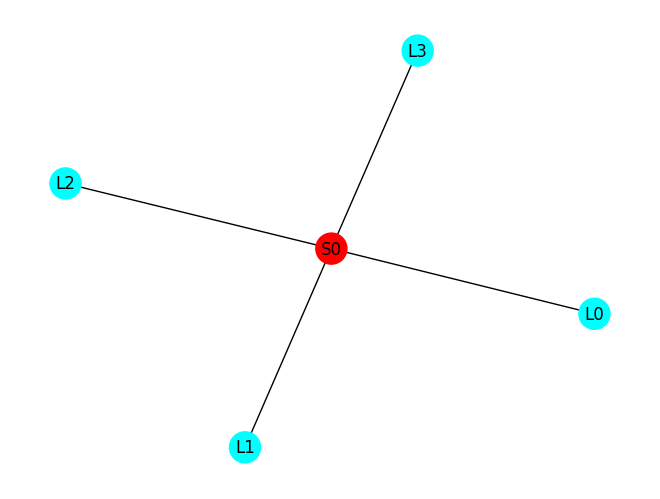

In [32]:
nviz.plot_soma_limb_concept_network(neuron_obj)

In [35]:
nviz.visualize_neuron(neuron_obj,limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Step 4: Split Multi-Soma Merges